<a href="https://colab.research.google.com/github/sjstar19/customer_churn_prediction/blob/main/Telco_customerchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns in the dataset:
Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')
A

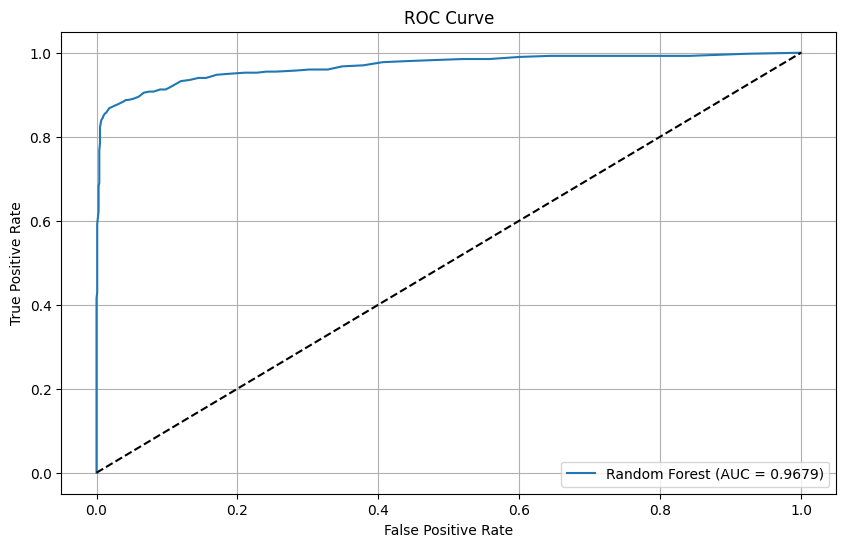

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('telco.csv')

# Display the columns of the DataFrame
print("Columns in the dataset:")
print(df.columns)

# Define the features and target variable
# Update the column names based on the actual columns present in the DataFrame
columns_to_drop = ['Customer ID', 'Churn Label', 'Churn Score', 'Churn Category', 'Churn Reason', 'Customer Status']
# Check which columns exist before trying to drop them
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
X = df.drop(existing_columns_to_drop, axis=1)

# Ensure the target variable exists
if 'Churn Label' in df.columns:
    y = df['Churn Label']
else:
    raise ValueError("Error: 'Churn Label' column not found in the dataset.")

# Handle categorical variables by encoding them
X = pd.get_dummies(X, drop_first=True)

# Convert 'Churn Label' to numeric using LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your 'Churn Label' and transform it
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC Score: {auc_score:.4f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) # Now y_test is numeric and should work
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.4f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [5]:
!pip install dash dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 15.1 MB/s eta 0:00:00


In [6]:
from google.colab import files
uploaded = files.upload()

Saving telco.csv to telco (1).csv


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the dataset
df = pd.read_csv('telco.csv')

# Preprocess the data
columns_to_drop = ['Customer ID', 'Churn Label', 'Churn Score', 'Churn Category', 'Churn Reason', 'Customer Status']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(existing_columns_to_drop, axis=1)

if 'Churn Label' in df.columns:
    y = df['Churn Label']
else:
    raise ValueError("Error: 'Churn Label' column not found in the dataset.")

# Handle categorical variables by encoding them
X = pd.get_dummies(X, drop_first=True)

# Convert 'Churn Label' to numeric using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class
auc_score = roc_auc_score(y_test, y_pred_proba)

# Create a Dash application
app = Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Customer Churn Dashboard"),
    html.Div(f"AUC-ROC Score: {auc_score:.4f}"),

    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in X.columns],
        value=X.columns[0],  # Default value
        multi=False
    ),

    dcc.Graph(id='feature-graph'),

    # Additional insights
    dcc.Graph(id='gender-churn-graph'),
    dcc.Graph(id='contract-churn-graph'),
    dcc.Graph(id='avg-monthly-charge-graph'),
    dcc.Graph(id='satisfaction-score-graph'),
])

# Callback to update the graph based on selected feature
@app.callback(
    Output('feature-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_graph(selected_feature):
    # Create a bar chart showing the average churn rate for the selected feature
    df['Churn'] = y
    feature_churn = df.groupby(selected_feature)['Churn'].mean().reset_index()
    fig = px.bar(feature_churn, x=selected_feature, y='Churn',
                  labels={selected_feature: selected_feature, 'Churn': 'Average Churn Rate'},
                  title=f'Average Churn Rate by {selected_feature}')
    return fig

# Callback for gender churn visualization
@app.callback(
    Output('gender-churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_gender_churn_graph(selected_feature):
    gender_churn = df.groupby('Gender')['Churn'].mean().reset_index()
    fig = px.bar(gender_churn, x='Gender', y='Churn',
                  labels={'Churn': 'Average Churn Rate'},
                  title='Average Churn Rate by Gender')
    return fig

# Callback for contract churn visualization
@app.callback(
    Output('contract-churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_contract_churn_graph(selected_feature):
    contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()
    fig = px.bar(contract_churn, x='Contract', y='Churn',
                  labels={'Churn': 'Average Churn Rate'},
                  title='Average Churn Rate by Contract Type')
    return fig

# Callback for average monthly charge visualization
@app.callback(
    Output('avg-monthly-charge-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_avg_monthly_charge_graph(selected_feature):
    avg_monthly_charge = df.groupby('Churn')['Monthly Charge'].mean().reset_index()
    fig = px.bar(avg_monthly_charge, x='Churn', y='Monthly Charge',
                  labels={'Churn': 'Churn Status', 'Monthly Charge': 'Average Monthly Charge'},
                  title='Average Monthly Charge by Churn Status')
    return fig

# Callback for satisfaction score visualization
@app.callback(
    Output('satisfaction-score-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_satisfaction_score_graph(selected_feature):
    churned = df[df['Churn'] == 1]
    retained = df[df['Churn'] == 0]

    fig = px.histogram(churned, x='Satisfaction Score', nbins=20, opacity=0.7, color_discrete_sequence=['red'], title='Satisfaction Score Distribution for Churned Customers')
    fig.add_trace(px.histogram(retained, x='Satisfaction Score', nbins=20, opacity=0.7, color_discrete_sequence=['green']).data[0])
    fig.update_traces(name='Retained Customers', selector=dict(name='Satisfaction Score'))
    fig.update_layout(barmode='overlay', xaxis_title='Satisfaction Score', yaxis_title='Count')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [8]:
# Run the app
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [10]:
# prompt: genrate code to install sqlite3

!apt-get -y install sqlite3


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  sqlite3-doc
The following NEW packages will be installed:
  sqlite3
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 768 kB of archives.
After this operation, 1,873 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 sqlite3 amd64 3.37.2-2ubuntu0.3 [768 kB]
Fetched 768 kB in 2s (431 kB/s)
Selecting previously unselected package sqlite3.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../sqlite3_3.37.2-2ubuntu0.3_amd64.deb ...
Unpacking sqlite3 (3.37.2-2ubuntu0.3) ...
Setting up sqlite3 (3.37.2-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [11]:
import pandas as pd
import sqlite3

# Step 1: Load the dataset
df = pd.read_csv('telco.csv')

# Step 2: Create a SQLite database connection
conn = sqlite3.connect('telco_database.db')

# Step 3: Write the DataFrame to a SQL table
df.to_sql('telco_customers', conn, if_exists='replace', index=False)

# Step 4: Verify the data was inserted correctly
# Read from the database to confirm
query_result = pd.read_sql_query("SELECT * FROM telco_customers LIMIT 5;", conn)
print(query_result)

# Step 5: Close the connection
conn.close()

  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                       390.80   

In [13]:
import pandas as pd
import sqlite3
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Create a SQLite database connection
conn = sqlite3.connect('telco_database.db')

# Step 2: Load the data from the SQL table into a DataFrame
df = pd.read_sql_query("SELECT * FROM telco_customers;", conn)

# Preprocess the data
columns_to_drop = ['Customer ID', 'Churn Label', 'Churn Score', 'Churn Category', 'Churn Reason', 'Customer Status']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(existing_columns_to_drop, axis=1)

if 'Churn Label' in df.columns:
    y = df['Churn Label']
else:
    raise ValueError("Error: 'Churn Label' column not found in the dataset.")

# Handle categorical variables by encoding them
X = pd.get_dummies(X, drop_first=True)

# Convert 'Churn Label' to numeric using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class
auc_score = roc_auc_score(y_test, y_pred_proba)

# Create a Dash application
app = Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Customer Churn Dashboard"),
    html.Div(f"AUC-ROC Score: {auc_score:.4f}"),

    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in X.columns],
        value=X.columns[0],  # Default value
        multi=False
    ),

    dcc.Graph(id='feature-graph'),

    # Additional insights
    dcc.Graph(id='gender-churn-graph'),
    dcc.Graph(id='contract-churn-graph'),
    dcc.Graph(id='avg-monthly-charge-graph'),
    dcc.Graph(id='satisfaction-score-graph'),
])

# Callback to update the graph based on selected feature
@app.callback(
    Output('feature-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_graph(selected_feature):
    # Create a bar chart showing the average churn rate for the selected feature
    df['Churn'] = y
    feature_churn = df.groupby(selected_feature)['Churn'].mean().reset_index()
    fig = px.bar(feature_churn, x=selected_feature, y='Churn',
                  labels={selected_feature: selected_feature, 'Churn': 'Average Churn Rate'},
                  title=f'Average Churn Rate by {selected_feature}')
    return fig

# Callback for gender churn visualization
@app.callback(
    Output('gender-churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_gender_churn_graph(selected_feature):
    gender_churn = df.groupby('Gender')['Churn'].mean().reset_index()
    fig = px.bar(gender_churn, x='Gender', y='Churn',
                  labels={'Churn': 'Average Churn Rate'},
                  title='Average Churn Rate by Gender')
    return fig

# Callback for contract churn visualization
@app.callback(
    Output('contract-churn-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_contract_churn_graph(selected_feature):
    contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()
    fig = px.bar(contract_churn, x='Contract', y='Churn',
                  labels={'Churn': 'Average Churn Rate'},
                  title='Average Churn Rate by Contract Type')
    return fig

# Callback for average monthly charge visualization
@app.callback(
    Output('avg-monthly-charge-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_avg_monthly_charge_graph(selected_feature):
    avg_monthly_charge = df.groupby('Churn')['Monthly Charge'].mean().reset_index()
    fig = px.bar(avg_monthly_charge, x='Churn', y='Monthly Charge',
                  labels={'Churn': 'Churn Status', 'Monthly Charge': 'Average Monthly Charge'},
                  title='Average Monthly Charge by Churn Status')
    return fig

# Callback for satisfaction score visualization
@app.callback(
    Output('satisfaction-score-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_satisfaction_score_graph(selected_feature):
    churned = df[df['Churn'] == 1]
    retained = df[df['Churn'] == 0]

    fig = px.histogram(churned, x='Satisfaction Score', nbins=20, opacity=0.7, color_discrete_sequence=['red'], title='Satisfaction Score Distribution for Churned Customers')
    fig.add_trace(px.histogram(retained, x='Satisfaction Score', nbins=20, opacity=0.7, color_discrete_sequence=['green']).data[0])
    fig.update_traces(name='Retained Customers', selector=dict(name='Satisfaction Score'))
    fig.update_layout(barmode='overlay', xaxis_title='Satisfaction Score', yaxis_title='Count')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>